In [1]:
import os

import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

In [2]:
raw_data_path = 'data/'
nrows = 100000

train_identity = pd.read_csv(f'{raw_data_path}train_identity.csv',nrows=nrows)
train_transaction = pd.read_csv(f'{raw_data_path}train_transaction.csv',nrows=nrows)
test_identity = pd.read_csv(f'{raw_data_path}test_identity.csv',nrows=nrows)
test_transaction = pd.read_csv(f'{raw_data_path}test_transaction.csv',nrows=nrows)
sub = pd.read_csv(f'{raw_data_path}sample_submission.csv',nrows=nrows)
'''
train_identity = pd.read_csv(f'{raw_data_path}train_identity.csv')
train_transaction = pd.read_csv(f'{raw_data_path}train_transaction.csv')
test_identity = pd.read_csv(f'{raw_data_path}test_identity.csv')
test_transaction = pd.read_csv(f'{raw_data_path}test_transaction.csv')
sub = pd.read_csv(f'{raw_data_path}sample_submission.csv')
'''
# let's combine the data and work with the whole dataset
train = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

print(f'Train dataset has {train.shape[0]} rows and {train.shape[1]} columns.')
print(f'Test dataset has {test.shape[0]} rows and {test.shape[1]} columns.')

Train dataset has 100000 rows and 434 columns.
Test dataset has 100000 rows and 433 columns.


In [3]:
train['TransactionAmt_to_mean_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_mean_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('mean')
train['TransactionAmt_to_std_card1'] = train['TransactionAmt'] / train.groupby(['card1'])['TransactionAmt'].transform('std')
train['TransactionAmt_to_std_card4'] = train['TransactionAmt'] / train.groupby(['card4'])['TransactionAmt'].transform('std')

test['TransactionAmt_to_mean_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_mean_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('mean')
test['TransactionAmt_to_std_card1'] = test['TransactionAmt'] / test.groupby(['card1'])['TransactionAmt'].transform('std')
test['TransactionAmt_to_std_card4'] = test['TransactionAmt'] / test.groupby(['card4'])['TransactionAmt'].transform('std')

train['id_02_to_mean_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('mean')
train['id_02_to_mean_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('mean')
train['id_02_to_std_card1'] = train['id_02'] / train.groupby(['card1'])['id_02'].transform('std')
train['id_02_to_std_card4'] = train['id_02'] / train.groupby(['card4'])['id_02'].transform('std')

test['id_02_to_mean_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('mean')
test['id_02_to_mean_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('mean')
test['id_02_to_std_card1'] = test['id_02'] / test.groupby(['card1'])['id_02'].transform('std')
test['id_02_to_std_card4'] = test['id_02'] / test.groupby(['card4'])['id_02'].transform('std')

train['D15_to_mean_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('mean')
train['D15_to_mean_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('mean')
train['D15_to_std_card1'] = train['D15'] / train.groupby(['card1'])['D15'].transform('std')
train['D15_to_std_card4'] = train['D15'] / train.groupby(['card4'])['D15'].transform('std')

test['D15_to_mean_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('mean')
test['D15_to_mean_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('mean')
test['D15_to_std_card1'] = test['D15'] / test.groupby(['card1'])['D15'].transform('std')
test['D15_to_std_card4'] = test['D15'] / test.groupby(['card4'])['D15'].transform('std')


train['dist1_to_mean_card1'] = train['dist1'] / train.groupby(['card1'])['dist1'].transform('mean')
train['dist1_to_mean_card4'] = train['dist1'] / train.groupby(['card4'])['dist1'].transform('mean')
train['dist1_to_std_card1'] = train['dist1'] / train.groupby(['card1'])['dist1'].transform('std')
train['dist1_to_std_card4'] = train['dist1'] / train.groupby(['card4'])['dist1'].transform('std')

test['dist1_to_mean_card1'] = test['dist1'] / test.groupby(['card1'])['dist1'].transform('mean')
test['dist1_to_mean_card4'] = test['dist1'] / test.groupby(['card4'])['dist1'].transform('mean')
test['dist1_to_std_card1'] = test['dist1'] / test.groupby(['card1'])['dist1'].transform('std')
test['dist1_to_std_card4'] = test['dist1'] / test.groupby(['card4'])['dist1'].transform('std')


train['D4_to_mean_card1'] = train['D4'] / train.groupby(['card1'])['D4'].transform('mean')
train['D4_to_mean_card4'] = train['D4'] / train.groupby(['card4'])['D4'].transform('mean')
train['D4_to_std_card1'] = train['D4'] / train.groupby(['card1'])['D4'].transform('std')
train['D4_to_std_card4'] = train['D4'] / train.groupby(['card4'])['D4'].transform('std')

test['D4_to_mean_card1'] = test['D4'] / test.groupby(['card1'])['D4'].transform('mean')
test['D4_to_mean_card4'] = test['D4'] / test.groupby(['card4'])['D4'].transform('mean')
test['D4_to_std_card1'] = test['D4'] / test.groupby(['card1'])['D4'].transform('std')
test['D4_to_std_card4'] = test['D4'] / test.groupby(['card4'])['D4'].transform('std')

train['card1_count'] = train.groupby(['card1'])['TransactionID'].transform('count')
train['card2_count'] = train.groupby(['card2'])['TransactionID'].transform('count')
train['card4_count'] = train.groupby(['card4'])['TransactionID'].transform('count')

test['card1_count'] = test.groupby(['card1'])['TransactionID'].transform('count')
test['card2_count'] = test.groupby(['card2'])['TransactionID'].transform('count')
test['card4_count'] = test.groupby(['card4'])['TransactionID'].transform('count')

In [4]:
many_null_cols = [col for col in train.columns if train[col].isnull().sum() / train.shape[0] > 0.9]
many_null_cols_test = [col for col in test.columns if test[col].isnull().sum() / test.shape[0] > 0.9]

In [5]:
big_top_value_cols = [col for col in train.columns if train[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]
big_top_value_cols_test = [col for col in test.columns if test[col].value_counts(dropna=False, normalize=True).values[0] > 0.9]

In [6]:
one_value_cols = [col for col in train.columns if train[col].nunique() <= 1]
one_value_cols_test = [col for col in test.columns if test[col].nunique() <= 1]
one_value_cols == one_value_cols_test

False

In [7]:
cols_to_drop = list(set(many_null_cols + many_null_cols_test + big_top_value_cols + big_top_value_cols_test + one_value_cols+ one_value_cols_test))
len(cols_to_drop)

137

In [8]:
cols_to_drop.remove('isFraud')

In [9]:
train = train.drop(cols_to_drop, axis=1)
test = test.drop(cols_to_drop, axis=1)

In [10]:
cat_cols = ['id_12', 'id_13', 'id_14', 'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22', 'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29',
            'id_30', 'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38', 'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6', 'M4','P_emaildomain',
            'R_emaildomain', 'card1', 'card2', 'card3',  'card5', 'addr1', 'addr2', 'M1', 'M2', 'M3', 'M5', 'M6', 'M7', 'M8', 'M9']
for col in cat_cols:
    if col in train.columns:
        train = train.drop([col], axis=1)
        test = test.drop([col], axis=1)

In [11]:
X = train.sort_values('TransactionDT').drop(['isFraud', 'TransactionDT', 'TransactionID'], axis=1)
y = train.sort_values('TransactionDT')['isFraud']
X_test = test.sort_values('TransactionDT').drop(['TransactionDT', 'TransactionID'], axis=1)

train = train[["TransactionDT", 'TransactionID']]
test = test[["TransactionDT", 'TransactionID']]

In [12]:
X.shape

(100000, 284)

In [13]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [14]:
X.fillna(0, inplace = True)

In [15]:
X.replace([np.inf, -np.inf], np.nan, inplace = True)

In [16]:
X.fillna(0, inplace = True)

In [17]:
standardized_X = preprocessing.scale(X)
clus_train = preprocessing.normalize(X)
clus_train

array([[4.63478256e-02, 1.28556013e-02, 6.76610593e-04, ...,
        4.05966356e-03, 0.00000000e+00, 9.89204687e-01],
       [9.79435860e-04, 0.00000000e+00, 3.37736503e-05, ...,
        4.42434819e-03, 2.54315587e-02, 9.99666276e-01],
       [8.95905067e-04, 4.35804668e-03, 1.51848316e-05, ...,
        2.00439778e-03, 8.72064881e-02, 9.96155325e-01],
       ...,
       [5.58170016e-04, 0.00000000e+00, 1.11634003e-05, ...,
        1.67451005e-04, 8.24640381e-02, 7.32341387e-01],
       [5.48669328e-04, 0.00000000e+00, 5.48669328e-06, ...,
        5.21235861e-03, 1.86328104e-02, 1.62400634e-01],
       [1.64460830e-03, 7.46510483e-04, 1.99577292e-03, ...,
        4.12866002e-03, 2.72247803e-02, 9.99440423e-01]])

In [18]:
clus_train

array([[4.63478256e-02, 1.28556013e-02, 6.76610593e-04, ...,
        4.05966356e-03, 0.00000000e+00, 9.89204687e-01],
       [9.79435860e-04, 0.00000000e+00, 3.37736503e-05, ...,
        4.42434819e-03, 2.54315587e-02, 9.99666276e-01],
       [8.95905067e-04, 4.35804668e-03, 1.51848316e-05, ...,
        2.00439778e-03, 8.72064881e-02, 9.96155325e-01],
       ...,
       [5.58170016e-04, 0.00000000e+00, 1.11634003e-05, ...,
        1.67451005e-04, 8.24640381e-02, 7.32341387e-01],
       [5.48669328e-04, 0.00000000e+00, 5.48669328e-06, ...,
        5.21235861e-03, 1.86328104e-02, 1.62400634e-01],
       [1.64460830e-03, 7.46510483e-04, 1.99577292e-03, ...,
        4.12866002e-03, 2.72247803e-02, 9.99440423e-01]])

In [19]:
#clus_train = X

In [20]:
from scipy.spatial.distance import cdist
clusters=range(1,15)
meandist=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(clus_train)
    #Adding average euclidean distance between the model.cluster_centers_, the cluster centroids from the model results, to array.
    meandist.append(sum(np.min(cdist(clus_train, model.cluster_centers_, 'euclidean'), axis=1)) 
    / clus_train.shape[0])

In [21]:
import matplotlib.pylab as plt

Text(0.5, 1.0, 'Выбор k методом Elbow Method')

/home/renat/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


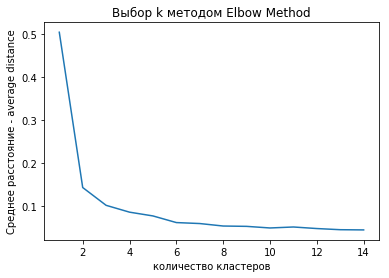

In [22]:
import matplotlib
matplotlib.rc('font', family='Verdana')

plt.plot(clusters, meandist)
plt.xlabel(u'количество кластеров')
plt.ylabel(u'Среднее расстояние - average distance')
plt.title(u'Выбор k методом Elbow Method')

In [23]:
model5=KMeans(n_clusters=5)
model5.fit(clus_train)
# plot clusters

from sklearn import manifold
tsne = manifold.TSNE(n_components = 2, init = 'pca', random_state = 0)
plot_columns = tsne.fit_transform(clus_train)

In [24]:
from matplotlib.pyplot import figure

In [25]:
#Merge pca results with cluster_ids for future reference
pca_clusters_tsne5 = pd.DataFrame({'x':plot_columns[:,0],'y':plot_columns[:,1],'cluster':model5.labels_[:]})

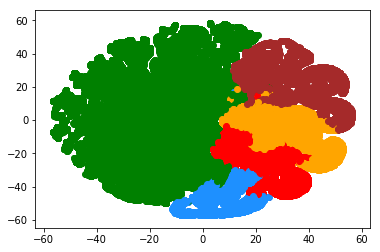

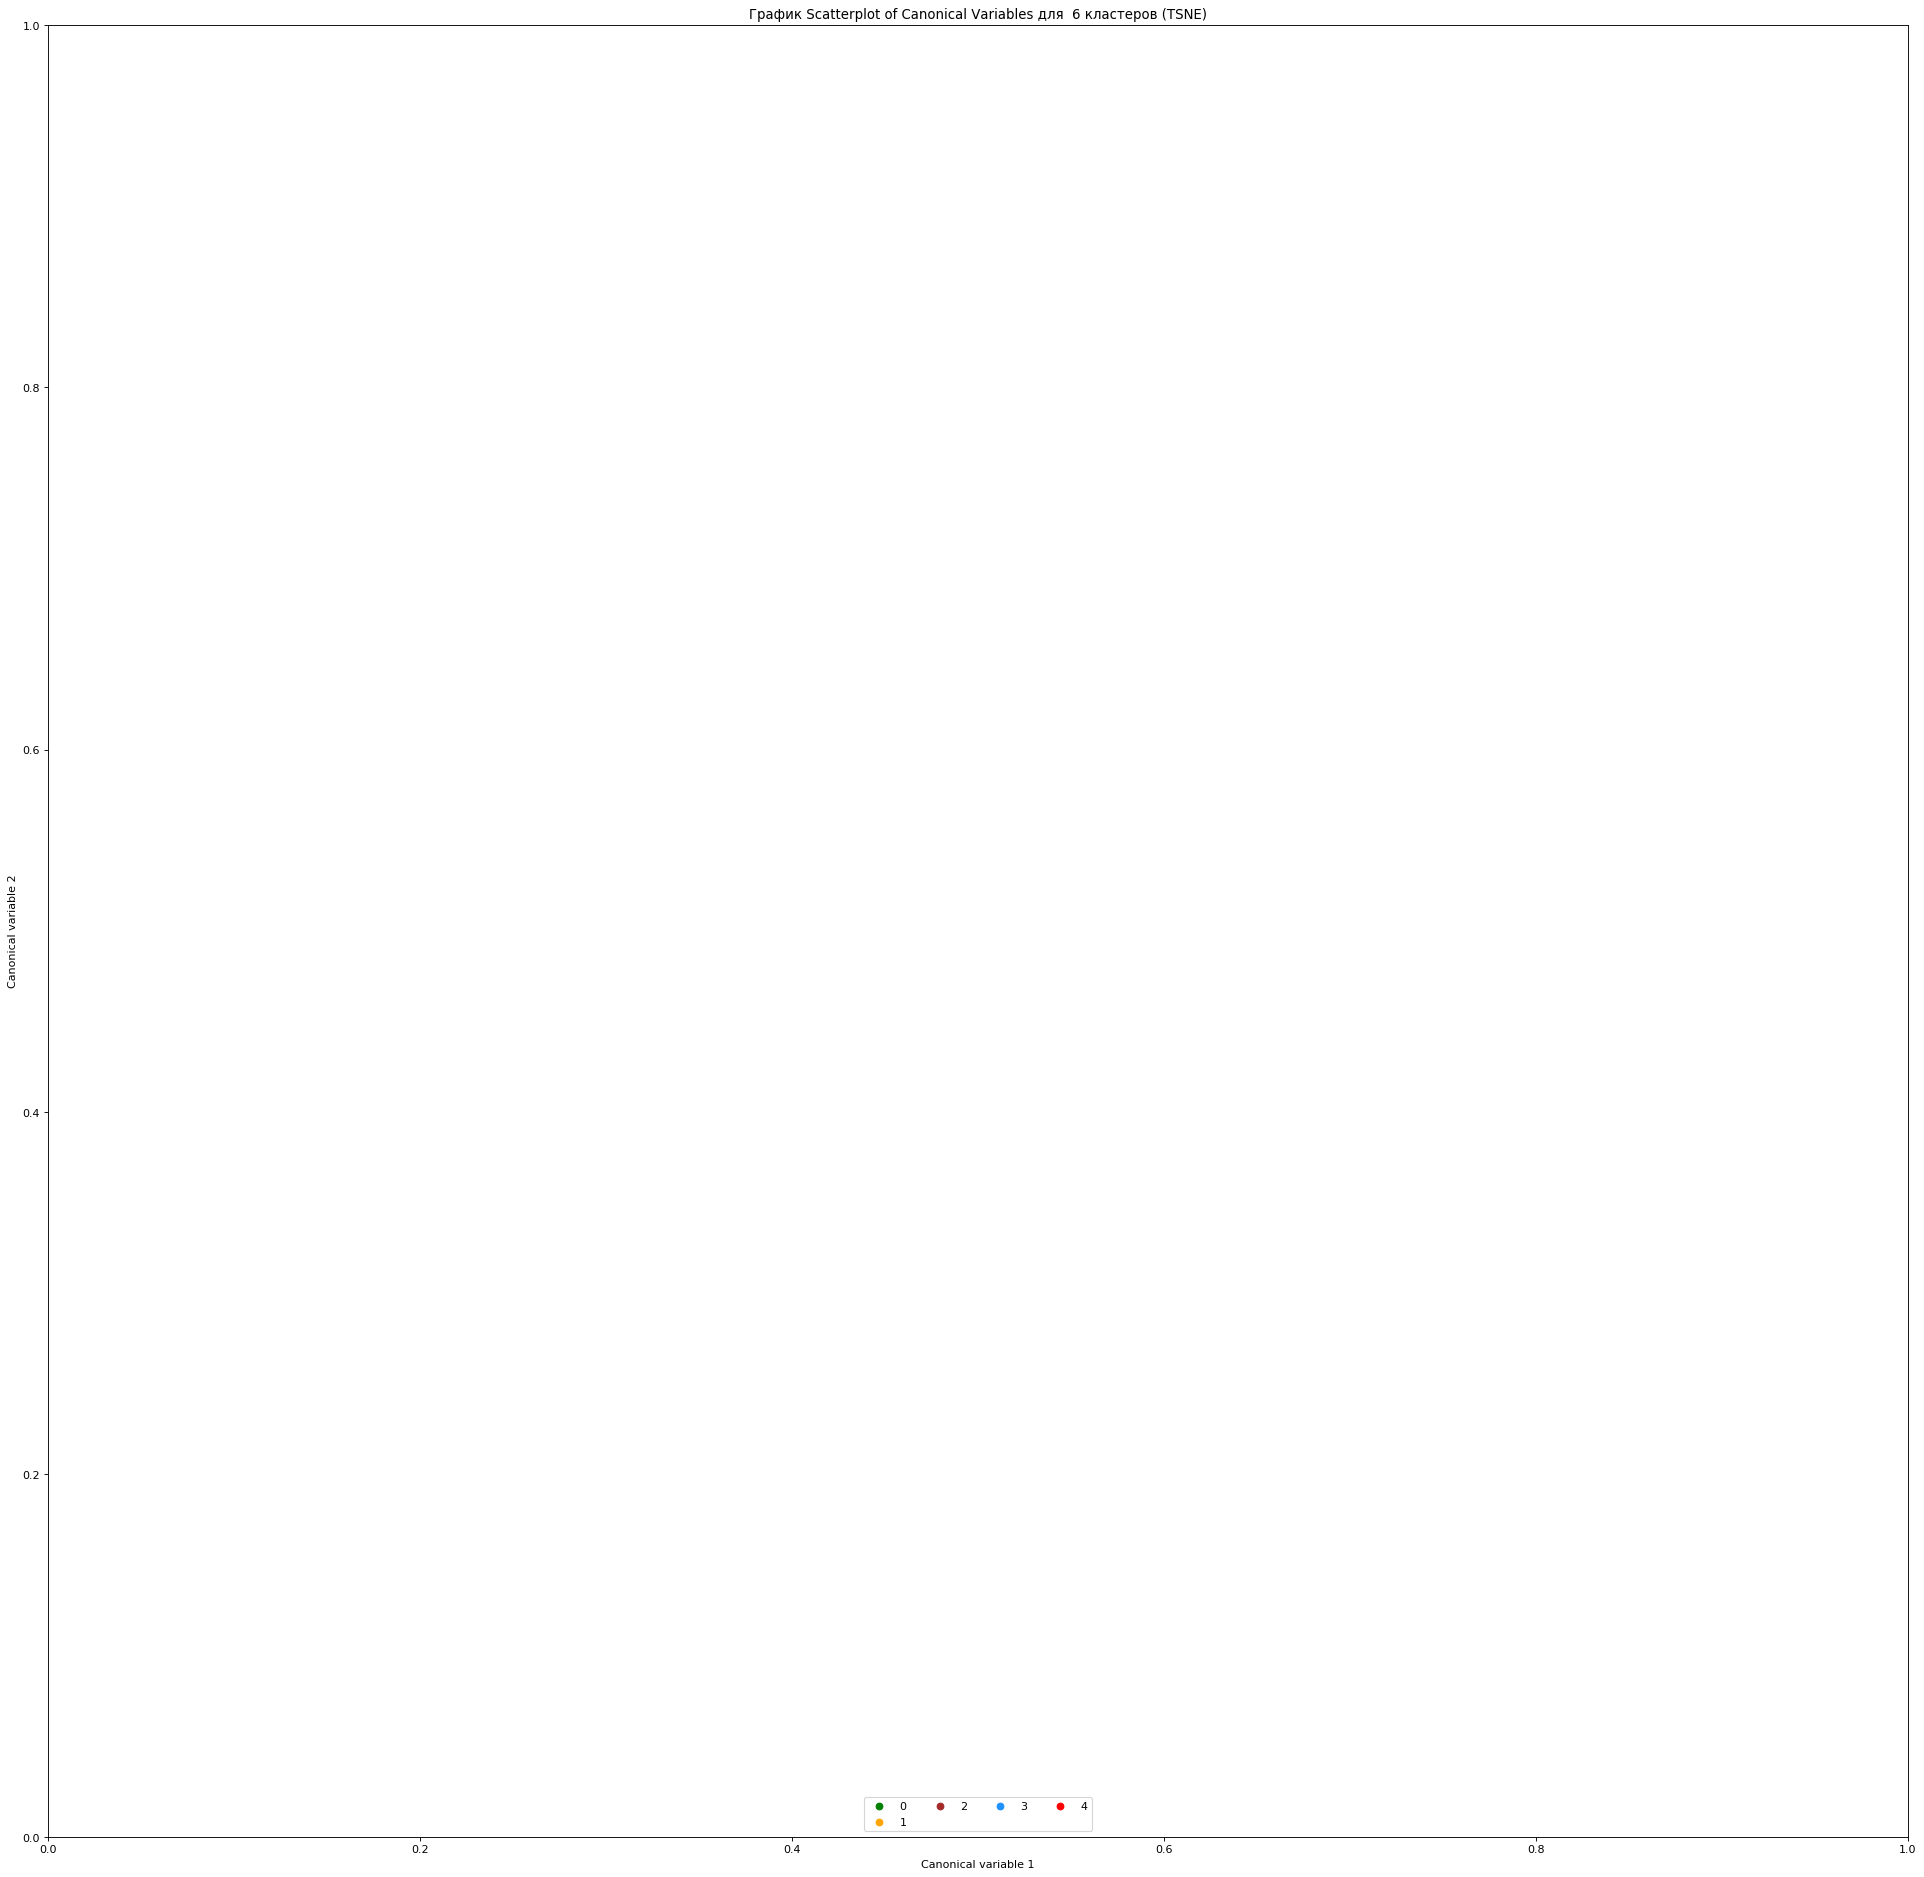

In [29]:
#Adding a legend with labels
colors= ['green','orange','brown','dodgerblue','red']
#hsv = plt.get_cmap('hsv')
#colors = hsv(np.linspace(0, 1.0, 4))


#Create empty array of objects to receive plots
c = [None] * 5

for i in range(0, plot_columns.shape[0]):
    c[model5.labels_[i]] =  plt.scatter(x=plot_columns[i,0], y=plot_columns[i,1], c=colors[model5.labels_[i]],label=model5.labels_[i])
    
import matplotlib

figure(num=None, figsize=(30, 30), dpi=80, facecolor='w', edgecolor='k')
matplotlib.rc('font', family='Verdana')
    
plt.xlabel('Canonical variable 1')
plt.ylabel('Canonical variable 2')
plt.legend(c, ['0','1','2','3','4'],loc='lower center', ncol=4)
plt.title(u'График Scatterplot of Canonical Variables для  6 кластеров (TSNE)')
plt.show()

In [30]:
pca_clusters_tsne5.cluster.value_counts()

0    60707
2    12858
1    12001
4     9092
3     5342
Name: cluster, dtype: int64